# Pymaceuticals Inc.
---

### Analysis

Below analysis is based on tumor volume information from 249 mice with cancer, that were treated by 10 different drugs. Capomulin and Ramicane drugs have the highest number of recorded timepoints among the other drugs. Analyzing the Summary Statistics table for all the drug regimens, Capomulin and Ramicane stand out by having the lowest values on Mean,  Median, Variance, Std. Dev and Std. Err of Tumor Volume.

Another observation comes from analyzing average tumor volume and mice weight: there appears to be a positive correlation between the two variables, average tumor volume is increasing along with higher weight recorded in mice. The correlation coefficient between mouse weight and the average tumor volume is 0.84.
 

In [96]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, how="outer", on="Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [97]:
# Checking the number of mice.
combined_data["Mouse ID"].nunique()

249

In [98]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_data.loc[combined_data.duplicated(["Mouse ID", "Timepoint"]), :]


# REFERENCE: https://towardsdatascience.com/finding-and-removing-duplicate-rows-in-pandas-dataframe-c6117668631f

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [99]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_data.loc[combined_data["Mouse ID"]=="g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [100]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep="last")

# Check for the duplicate Mouse ID
clean_data.loc[clean_data["Mouse ID"]=="g989"]


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26
870,g989,25,56.045564,1,Propriva,Female,21,26
871,g989,30,59.082294,1,Propriva,Female,21,26
872,g989,35,62.570880,2,Propriva,Female,21,26


In [101]:
# Checking the number of mice in the clean DataFrame.
# Not sure why in the example there is one less Mouse ID count??? - Ask in class

clean_data["Mouse ID"].nunique()

249

In [102]:
# Check for no more duplicate rows of Mouse ID and Timepoint combination
clean_data.loc[clean_data.duplicated(["Mouse ID", "Timepoint"]), :]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)


## Summary Statistics

In [103]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

tumor_v_mean = clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
tumor_v_median = clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
tumor_v_variance = clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
tumor_v_stdev = clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
tumor_v_sterr = clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()
stats_data = {"Mean Tumor Volume": tumor_v_mean,
               "Median Tumor Volume": tumor_v_median,
               "Tumor Volume Variance": tumor_v_variance,
               "Tumor Volume Std. Dev.": tumor_v_stdev,
               "Tumor Volume Std. Err.": tumor_v_sterr}

stats_df = pd.DataFrame(stats_data)
stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [104]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_stats = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].aggregate(['mean', 'median', 'var', 'std','sem'])

# Renaming columns

summary_stats = summary_stats.rename(columns={'mean': "Mean Tumor Volume",
                                              'median': "Median Tumor Volume",
                                              'var': "Tumor Volume Variance",
                                              'std': "Tumor Volume Std. Dev.",
                                              'sem': "Tumor Volume Std. Err."})

summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

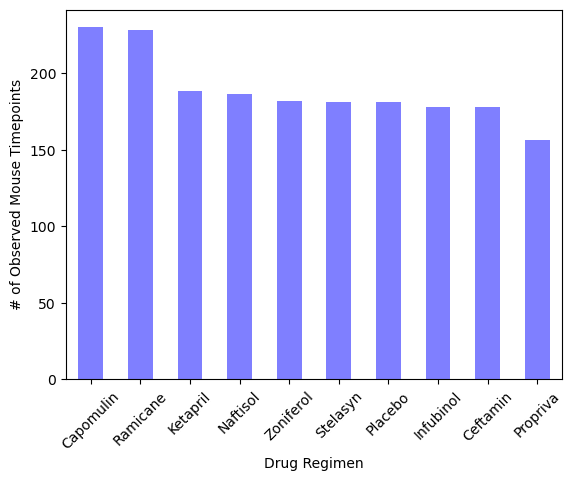

In [105]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_data = clean_data[["Mouse ID", "Timepoint", "Drug Regimen"]].set_index("Drug Regimen")
bar_data = bar_data.index.value_counts()
bar_data.plot(kind="bar", xlabel = "Drug Regimen", ylabel = "# of Observed Mouse Timepoints", color="blue", alpha=0.5)
plt.xticks(rotation = 45)

plt.show()

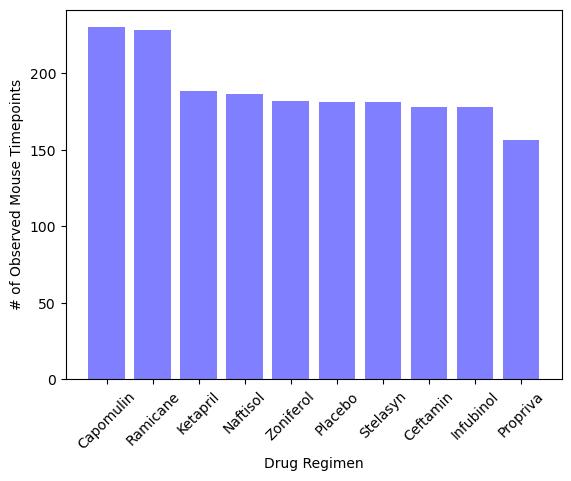

In [106]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
bar_data2 = clean_data[["Mouse ID", "Timepoint", "Drug Regimen"]]
bar_data2 = bar_data2.groupby(["Drug Regimen"]).count().reset_index().sort_values(by="Mouse ID", ascending=False)
bar_data2

plt.bar(bar_data2["Drug Regimen"], bar_data2["Mouse ID"], color="b", align = "center", alpha=0.5)
plt.xticks(rotation = 45)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

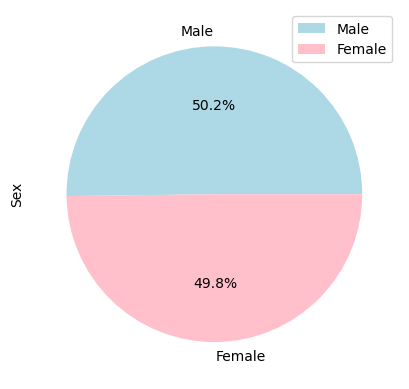

In [170]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex_data = clean_data[["Mouse ID", "Sex"]]
sex_data = sex_data.drop_duplicates().groupby(["Sex"]).count().sort_values(by="Mouse ID", ascending=False)
sex_data.rename(columns={"Mouse ID": "Count"}, inplace=True)

sex_data.plot(kind="pie", y = "Count", autopct='%1.1f%%', colors=["lightblue", "pink"], startangle=0, ylabel="Sex")

plt.show()

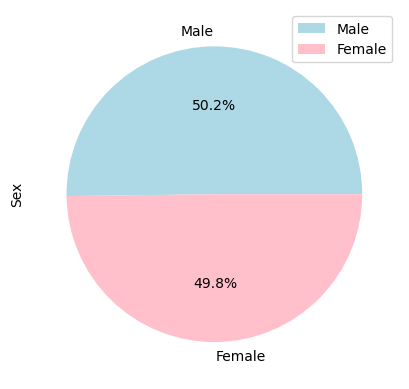

In [171]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sex_data2 = clean_data[["Mouse ID", "Sex"]]
sex_data2 = sex_data2.drop_duplicates().groupby(["Sex"]).count().sort_values(by="Mouse ID", ascending=False)
sex_data2.rename(columns={"Mouse ID": "Count"}, inplace=True)

labels = sex_data2.index
count = sex_data2["Count"]
colors = ["lightblue", "pink"]

plt.pie(count, labels=labels, colors=colors, autopct="%1.1f%%", startangle=0)
plt.ylabel("Sex")
plt.legend(loc="best")
plt.show()

## Quartiles, Outliers and Boxplots

In [172]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

clean_data
# Start by getting the last (greatest) timepoint for each mouse

last_timepoints = pd.DataFrame(clean_data.groupby(["Mouse ID", "Drug Regimen"])["Timepoint"].max()).reset_index()
last_timepoints


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

last_tumor_v_df = last_timepoints.merge(clean_data, how="left").drop(columns=["Metastatic Sites", "Sex", "Age_months", 
                                                                                "Weight (g)"])
last_tumor_v_df

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,a203,Infubinol,45,67.973419
1,a251,Infubinol,45,65.525743
2,a262,Placebo,45,70.717621
3,a275,Ceftamin,45,62.999356
4,a366,Stelasyn,30,63.440686
...,...,...,...,...
244,z435,Propriva,10,48.710661
245,z578,Ramicane,45,30.638696
246,z581,Infubinol,45,62.754451
247,z795,Naftisol,45,65.741070


In [174]:
# Put treatments into a list for for loop (and later for plot labels)

drug_regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drug_regimen
# Create empty list to fill with tumor vol data (for plotting)
tumor_plot_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.

quartiles = last_tumor_v_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # Determine outliers using upper and lower bounds

    

In [162]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

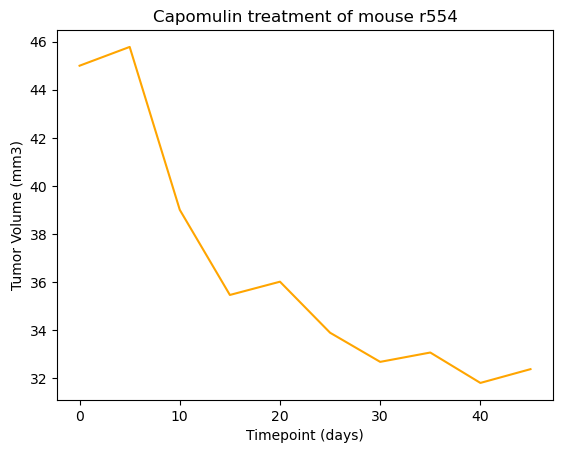

In [64]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = "r554"

capomulin_data = clean_data.loc[clean_data["Drug Regimen"]=="Capomulin", :]

per_mouse_plot = capomulin_data.loc[capomulin_data["Mouse ID"]== mouse_id, ["Timepoint", "Tumor Volume (mm3)"]].set_index("Timepoint")
per_mouse_plot.plot(kind="line", color = "orange", xlabel = "Timepoint (days)", ylabel = "Tumor Volume (mm3)", 
                    legend = False, title = f"Capomulin treatment of mouse " + mouse_id)
plt.show()


In [207]:
capomulin_data["Mouse ID"].unique()

array(['b128', 'j246', 'r554', 's185', 'b742', 'x401', 'l509', 's710',
       'r157', 'u364', 'j119', 'v923', 'w914', 'i738', 'r944', 'y793',
       'g316', 'g288', 'l897', 'w150', 't565', 'i557', 'm957', 'f966',
       'm601'], dtype=object)

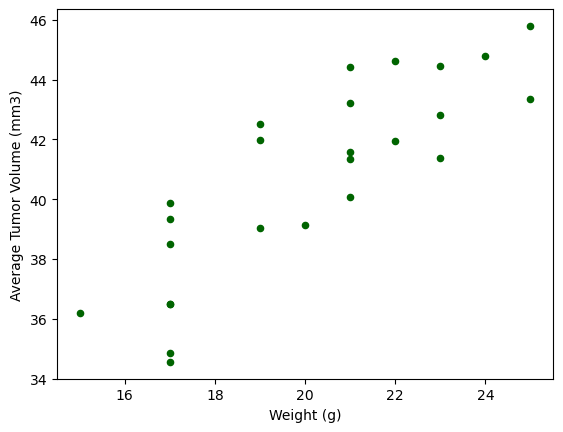

In [258]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
weight_plot = capomulin_data.groupby("Mouse ID")[["Weight (g)", "Tumor Volume (mm3)"]].mean().rename(columns={"Tumor Volume (mm3)": "Average Tumor Volume (mm3)"})
weight_plot.plot(kind="scatter", x="Weight (g)", y="Average Tumor Volume (mm3)", color = "darkgreen")
plt.show()

## Correlation and Regression

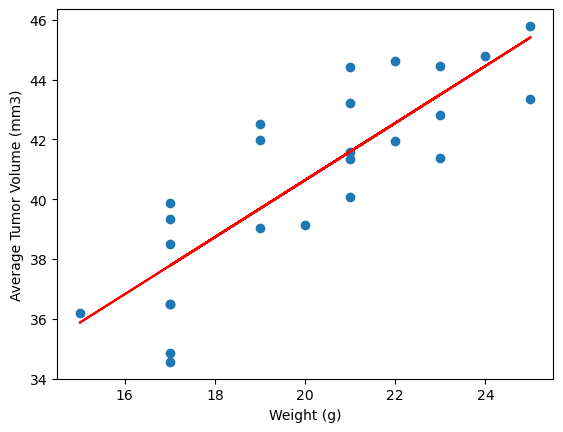

The correlation between mouse weight and the average tumor volume is 0.84


In [101]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

avg_tumor_df = capomulin_data.groupby("Mouse ID")[["Weight (g)", "Tumor Volume (mm3)"]].mean().rename(columns={"Tumor Volume (mm3)": "Average Tumor Volume (mm3)"})
avg_tumor_df = avg_tumor_df.reset_index(drop=True)
avg_tumor_df

weight_plot = avg_tumor_df.loc[:, "Weight (g)" ]
avg_tumor_plot = avg_tumor_df.loc[:, "Average Tumor Volume (mm3)" ]

t_slope, t_int, t_r, t_p, t_std_err = st.linregress(weight_plot, avg_tumor_plot)
t_fit = t_slope * weight_plot + t_int
plt.scatter(weight_plot,avg_tumor_plot)
plt.plot(weight_plot,t_fit, 'r')
plt.xlabel('Weight (g)')
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

print(f"The correlation between mouse weight and the average tumor volume is {round(t_r, 2)}")